In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import time

In [2]:
# Task 1:
# Wiener process simulating

######################
# Auxiliary functions:
######################

# Wiener process. Generates a path with random walk. 
# Takes size of walk N, time T
def Wiener_proc(N, T):
    W = np.zeros(N)  
    delta = T / N
    sqrt_delta = np.sqrt(delta)    
    for i in range (1, N):
        W[i] += W[i-1] + rnd.normal(0, sqrt_delta)
    return W

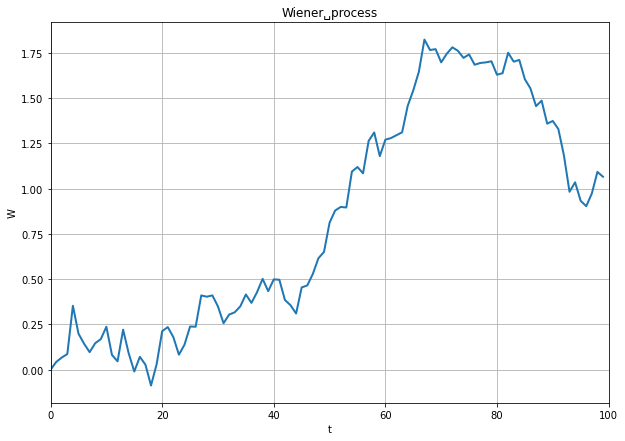

In [3]:
# Data:

# Grid size N, time period T
N = 100
T = 1
x_grid = [i for i in range(N)] 
# Generate Wiener process with func Wiener_proc(N, T)
W = Wiener_proc(N, T)

# Plot figure
plt . figure ( figsize =(10, 7) )
plt . grid ()
plt . plot (x_grid, W, linewidth =2.0)
plt . title ("Wiener␣process")
plt . xlabel ("t")
plt . ylabel ("W")
plt.xlim(0,N)
plt . show ()

In [5]:
#######################
# Auxiliary functions:
######################

# Adopt to another grid. Takes array A, new size N
def Adopt_gridline(A, N):
    W = np.zeros(N)
    crop_factor = int(N / len(A))
    for i in range(len(A)):
        for j in range(i * (crop_factor), (i+1) * (crop_factor)):
            W[j] = A[i]
    return W

# Squeeze sequence. Takes an array A and a new smaller size N
def Squeze_sequence(A, N):
    W = np.zeros(N)
    crop_factor = int(len(A) / N)
    W[0], W[N-1] = A[0], A[len(A)-1]
    for i in range(1, N-1):
        W[i] = A[i * crop_factor]
    return W

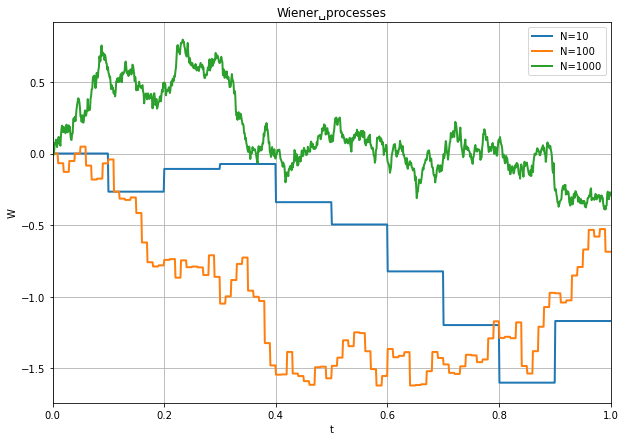

In [6]:
# Task 2:
# Simulate 3 paths of Wienere process with different N points:

# Data:
N1 = 10
N2 = 100
N3 = 1000
T  = 1
x_grid = np.linspace(0, T, N3)

# Generate paths
W1 = Adopt_gridline(Wiener_proc(N1, T), N3)
W2 = Adopt_gridline(Wiener_proc(N2, T), N3)
W3 = Wiener_proc(N3, T)

# Plot figure
plt . figure ( figsize =(10, 7) )
plt . grid ()
plt . plot (x_grid, W1, linewidth =2.0, label="N=10")
plt . plot (x_grid, W2, linewidth =2.0, label="N=100")
plt . plot (x_grid, W3, linewidth =2.0, label="N=1000")
plt . title ("Wiener␣processes")
plt . xlabel ("t")
plt . ylabel ("W")
plt . legend()

plt.xlim(0,1)
plt . show ()

In [1]:
# Task 2:
# Simulate 3 paths of Wienere process with different N points:

# Data:
N1 = 10
N2 = 100
N3 = 1000
T  = 1
x_grid = np.linspace(0, T, N3)

# Generate paths
W3 = Wiener_proc(N3, T)
W1 = Adopt_gridline(Squeze_sequence(W3, N1), N3)
W2 = Adopt_gridline(Squeze_sequence(W3, N2), N3)


# Plot figure
plt . figure ( figsize =(10, 7) )
plt . grid ()
plt . plot (x_grid, W1, linewidth =2.0, label="N=10")
plt . plot (x_grid, W2, linewidth =2.0, label="N=100")
plt . plot (x_grid, W3, linewidth =2.0, label="N=1000")
plt . title ("Wiener␣processes")
plt . xlabel ("t")
plt . ylabel ("W")
plt . legend()

plt.xlim(0,1)
plt . show ()

NameError: name 'np' is not defined

In [100]:
# Task 3:
# Simulate 3 paths of Wiener process with different N points
# using the Karhunen-Loeve expansion

#######################
# Auxiliary functions:
######################

# Phi func. Takes counter i, intermediate time point t, all timeline size T
def Phi(i, t, T):
    return (2 * np.sqrt(2 * T)) / ((2 * i + 1) * np.pi) * \
        np.sin(((2 * i + 1) * np.pi * t) / (2 * T))

# Wiener exp.
def Wiener_exp(seed, t, T):
    return sum([(seed[i] * Phi(i, t, T)) for i in range(len(seed))])

In [101]:
starttime = int(time.time_ns() / (10**9))

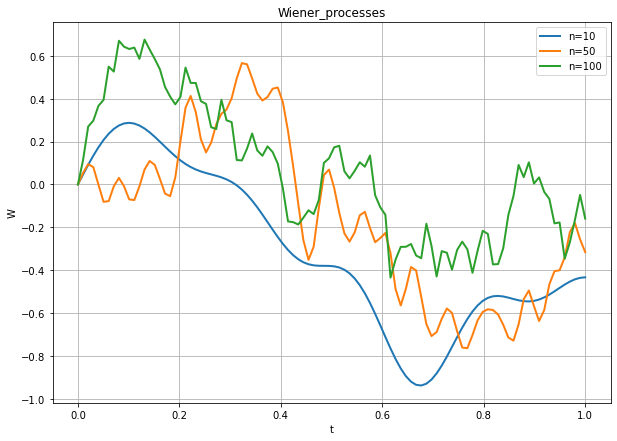

In [239]:
# Data:
N = 100
T = 1
time_line = np.linspace(0, 1, N)

plt . figure ( figsize =(10, 7) )
plt . grid ()

n = 10
z = rnd.normal(0, 1, n)
W = [Wiener_exp(z, t, T) for t in time_line]
plt.plot(time_line, W, linewidth=2, label="n=10")

n = 50
z = rnd.normal(0, 1, n)
W = [Wiener_exp(z, t, T) for t in time_line]
plt.plot(time_line, W, linewidth=2, label="n=50")

n = 200
z = rnd.normal(0, 1, n)
W = [Wiener_exp(z, t, T) for t in time_line]
plt.plot(time_line, W, linewidth=2, label="n=100")

plt . title ("Wiener_processes")
plt . xlabel ("t")
plt . ylabel ("W")
plt . legend()

In [121]:
# Task 3:
# Simulate GBM with sigma = 0.5, r = 1

#######################
# Auxiliary functions:
######################

# GBM function
def GBM(S, mu, sigma, dt):
    dS = mu * S * dt + sigma * S * rnd.normal(0, np.sqrt(dt))
    return dS

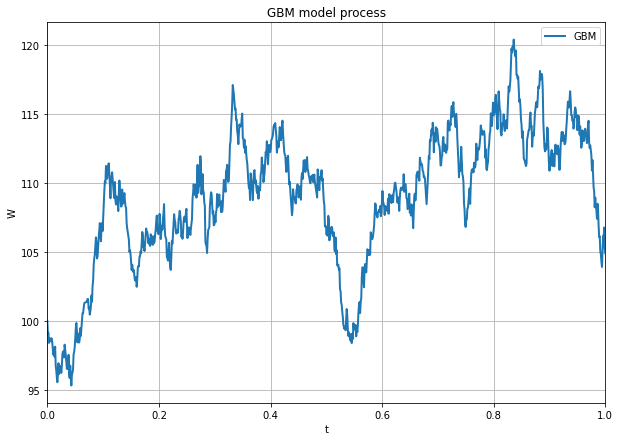

In [240]:
# Data:
N = 1000
T = 1
mu = 0.05
sigma = 0.2
time_line, dt = np.linspace(0, 1, N, retstep=True)
S = np.zeros(N)
S[0] = 100

for i in range(1, len(S)):
    S[i] = S[i-1] + GBM(S[i-1], mu, sigma, dt)
    
# Plot figure
plt . figure ( figsize =(10, 7) )
plt . grid ()
plt . plot (time_line, S, linewidth =2.0, label="GBM")
plt . title ("GBM model process")
plt . xlabel ("t")
plt . ylabel ("W")
plt . legend()
plt.xlim(0,1)
plt . show ()

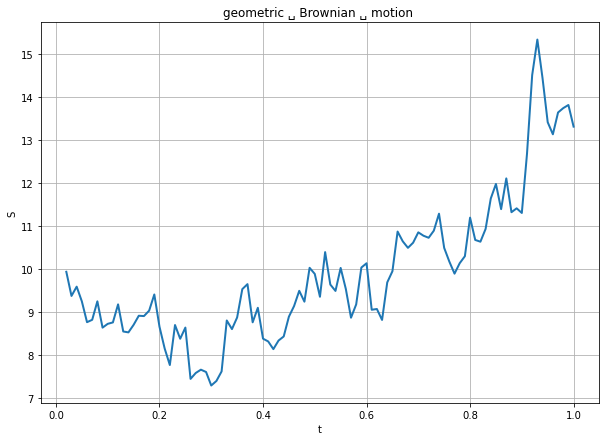

In [311]:
r =1
sigma =0.5
x =10
N =100
T =1
Delta = T / N
W = [0]
t = np . linspace (0,T , N +1)

for i in range (1, N ) :
    W.append(W[i-1] + rnd.normal (0, 1) * np.sqrt ( Delta )) 

S = [ x * np.exp (( r - sigma **2/2) * t [ i ] + sigma * W [ i ]) for i in range (1, len( W )) ]
plt . figure ( figsize =(10, 7) )
plt . grid ()
plt . plot (t[2:] , S, linewidth =2.0)
plt . title ("geometric ␣ Brownian ␣ motion ")
plt . xlabel ("t")
plt . ylabel ("S")
plt . show ()

In [8]:
# Task 3:
# Simulate GBM with sigma = 0.5, r = 1

#######################
# Auxiliary functions:
######################

# Brownian bridge. Takes initial process, starting points x, y, time_line
def Brownian_bridge(W, x, y, timeline):
    if (len(W) != len(timeline)):
        print("Array of Wiener process and timeline are not compatible!")
        return
    n = len(timeline) - 1
    Bb = [x + W[i] - (timeline[i] - timeline[0]) / (timeline[n] - timeline[0]) \
                      * (W[n] - y + x) for i in range(n+1)]
    return Bb

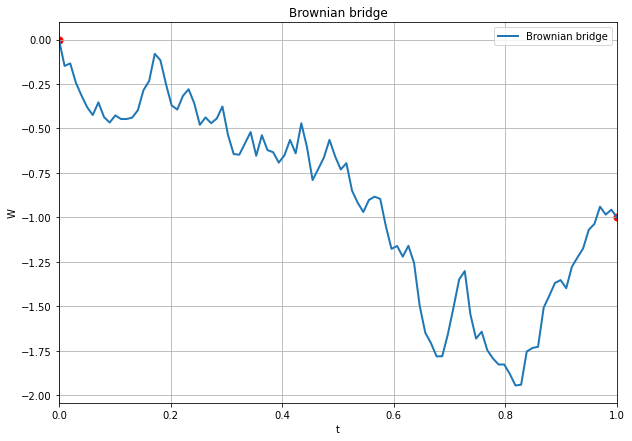

In [9]:
# Data
N = 100
T = 1
x = 0
y = -1
time_line = np.linspace(0, T, N)
W = Wiener_proc(100, T)

# Generate new process with brownian bridge(W, x, y, timeline):
BB = Brownian_bridge(W, x, y, time_line)

# Plot figure
plt . figure ( figsize =(10, 7) )
plt . grid ()
plt . plot (time_line, BB, linewidth =2.0, label="Brownian bridge")
plt . title ("Brownian bridge")
plt . xlabel ("t")
plt . ylabel ("W")
plt . scatter ( time_line [0] , x , color ="red",s =50)
plt . scatter ( time_line [len( time_line ) -1] , y , color ="red", s =50)
plt . legend()
plt.xlim(0,1)
plt . show ()